# 1. Motivation

The primary objective of this project was to develop a Convolutional Neural Network (CNN) based on the LeNet architecture, a pioneer in the field of computer vision, with the aim of evaluating its effectiveness in image classification. To conduct this evaluation, I utilized two widely recognized datasets in academia: [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) and [SVHN (Street View House Numbers)](http://ufldl.stanford.edu/housenumbers/).

To bring the experiment closer to real-world scenarios, I simulated the presence of Gaussian noise in the images during the training process, reflecting the diversity of image sources and capture conditions in real life. This is because different cameras have varying resolutions.

Finally, I examined the impact of this strategy on the performance of the models, seeking valuable insights for practical applications of convolutional neural networks in diverse and challenging environments.


# 2 Implementation

Importing Libraries

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from skimage.util import random_noise
import scipy.io
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import pickle
import seaborn as sns
from google.colab import drive
import scipy.io

## 2.1 Creating the CNN

The architecture utilized is a simplification of the [LeNet](https://en.wikipedia.org/wiki/LeNet) structure, originally proposed by Yann LeCun in 1989 for handwritten digit recognition. The LeNet architecture serves as a foundational model in the field of computer vision and is known for its effectiveness and efficiency.

The core structure of LeNet comprises alternating convolutional and pooling layers, followed by dense layers for classification. This arrangement allows the network to extract and learn high-level features from input images, enabling it to accurately categorize them.


The architecture implemented in this project can be summarized by the following steps:
1. Input Layer: The input is an image with dimensions 32x32x3, where 3 represents the RGB (red, green, and blue) channels, which capture the color information of the image.
2. Convolutional and MaxPooling Layers:  The structure follows an interactive pattern of convolutional layers and max-pooling layers, aiming to extract and refine relevant features from the images.

  * Convolutional Layers:
Each convolutional layer utilizes a 3x3 kernel, scanning the image pixel by pixel to identify patterns and features.

    The ReLU ("Rectified Linear Unit") activation function is applied to introduce non-linearity into the results, allowing the network to learn complex functions.

    The padding ('same') ensures that the output dimensions of the convolutional layer are equal to the input dimensions, preserving the image resolution.

* MaxPooling Layers:  After each convolutional layer, a max-pooling layer is applied with a pool size of 2x2. This step reduces the dimensionality of the images, decreasing the number of parameters and controlling the complexity of the model, which helps to prevent overfitting.
3. Flatten Layer: After the sequence of convolutional and max-pooling layers, the Flatten layer is used to convert the three-dimensional representation of the images (resulting from the convolutional layers) into a one-dimensional vector. This step prepares the data to be processed by the dense layers.

4. Dense (Fully Connected) Layer: The last layer of the network is a dense layer, also known as a fully connected layer, with 10 neurons. Each neuron in this layer represents one of the 10 classes present in the datasets used for training (digits 0 to 9).

  The softmax activation function is applied in the dense layer, generating values between 0 and 1 for each neuron. These values represent the probabilities of the evaluated image belonging to each of the 10 classes.


In [3]:
model = tf.keras.models.Sequential()
# Conv2D: 16 neurons (filters), kernels 3x3, ReLU
# MaxPooling2D: pool 2x2
model.add(tf.keras.layers.Conv2D(16, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(32,32,3)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
# Conv2D: 16 neurons (filters), kernels 3x3, ReLU
# Conv2D: 16 neurons (filters), kernels 3x3, ReLU
# MaxPooling2D: pool 2x2
model.add(tf.keras.layers.Conv2D(16, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.Conv2D(16, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
# Conv2D: 32 neurons (filters), kernels 3x3, ReLU
# Conv2D: 32 neurons (filters), kernels 3x3, ReLU
# MaxPooling2D: pool 2x2
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
# Flatten layer to transform the output of the third maxpooling (which will be a tensor) into a vector
model.add(tf.keras.layers.Flatten())
# Dense: 10 neurons
model.add(tf.keras.layers.Dense(10, activation='softmax'))
# softmax function chosen because this is a multi-class classification problem


In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 16)        2320      
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 16)          0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 32)          4

Explaining Some Architectural Decisions

* Padding
 * The `padding='same'` parameter controls how padding is applied to the input borders during convolution. When `padding='same'` is used, the input is padded in such a way that the output of the convolution has the same dimensions as the original input.

    In practical terms, this maintains the spatial resolution of the input across the convolutional layers, which helps to prevent the loss of information at the edges of the images during convolution operations.

* Initial Layers with 16 Neurons and Final Layers with 32
 * In a CNN, the initial layers are responsible for detecting low-level features, such as edges, simple textures, and simple color patterns. As we move through the layers of the network, the extracted features gradually become more complex and abstract, representing higher-level features such as shapes, object parts, and even entire objects.
  
    The variation in the number of neurons allows the network to learn and represent these features at different levels of abstraction. As the number of neurons increases in the later layers, the network is able to capture more complex patterns.

* ReLu
  * Its simple and easy-to-understand form, $f(x)=max(0,x)$, allows for efficient and fast computation, which is advantageous when training the network on large datasets. The ReLU function is also less susceptible to the [vanishing gradient problem](https://en.wikipedia.org/wiki/Vanishing_gradient_problem) compared to activation functions like sigmoid and tanh. This is because the derivative of ReLU is 1 for positive values and 0 for negative values, avoiding the gradient vanishing during backpropagation in deep network layers.

## 2.2 Data Loading and Preprocessing


Adjusting Data Dimensions for the Network and Splitting into Training and Test Sets

Code excerpt for data extraction sourced from the [Keras package documentation](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10/load_data):

In [5]:
(cifar10_x_train, cifar10_y_train), (cifar10_x_test, cifar10_y_test) = tf.keras.datasets.cifar10.load_data()
assert cifar10_x_train.shape == (50000, 32, 32, 3)
assert cifar10_x_test.shape == (10000, 32, 32, 3)
assert cifar10_y_train.shape == (50000, 1)
assert cifar10_y_test.shape == (10000, 1)

170498071/170498071 [==============================] - 2s 0us/step


In [6]:
cifar10_y_train = cifar10_y_train.reshape(-1)
cifar10_y_test = cifar10_y_test.reshape(-1)

cifar10_y_train.shape, cifar10_y_test.shape

((50000,), (10000,))


Dataset available on the [Stanford University website](http://ufldl.stanford.edu/housenumbers/). The original format at the time of analysis was in .mat typical of the Matlab tool. In this case, X_train and X_test have dimensions in a different order from the one used in the standard Keras package. The datasets were adjusted to the format (image id, rows, columns, and channels).


In [7]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
train_matrix = scipy.io.loadmat('/content/drive/MyDrive/Colab Notebooks/projetos usp/redes neurais/projeto 2/train_32x32.mat')
test_matrix = scipy.io.loadmat('/content/drive/MyDrive/Colab Notebooks/projetos usp/redes neurais/projeto 2/test_32x32.mat')

train_matrix.keys(), test_matrix.keys()

(dict_keys(['__header__', '__version__', '__globals__', 'X', 'y']),
 dict_keys(['__header__', '__version__', '__globals__', 'X', 'y']))

In [9]:
svhn_x_train = train_matrix['X']
svhn_y_train = train_matrix['y']
svhn_x_test = test_matrix['X']
svhn_y_test = test_matrix['y']


svhn_x_train.shape, svhn_x_test.shape,  svhn_y_train.shape, svhn_y_test.shape

((32, 32, 3, 73257), (32, 32, 3, 26032), (73257, 1), (26032, 1))

In [10]:
# adjusting the dimensions (image ID, rows, columns, and channels)
svhn_x_train = np.transpose(svhn_x_train, (3, 0, 1, 2))
svhn_x_test = np.transpose(svhn_x_test, (3, 0, 1, 2))

svhn_x_train.shape, svhn_x_test.shape

((73257, 32, 32, 3), (26032, 32, 32, 3))

In [11]:
svhn_y_train = svhn_y_train.reshape(-1)
svhn_y_test = svhn_y_test.reshape(-1)

svhn_y_train.shape, svhn_y_test.shape

((73257,), (26032,))

Converting data types to achieve reduced RAM consumption and accelerate the learning process.
Transformations made:
* Convert images (X_train and X_test) to float16.
* Convert classes (y_train and y_test) to uint8.


In [12]:
cifar10_x_train = cifar10_x_train.astype('float16')
cifar10_x_test = cifar10_x_test.astype('float16')


cifar10_y_train = cifar10_y_train.astype('uint8')
cifar10_y_test = cifar10_y_test.astype('uint8')


In [13]:
svhn_x_train = svhn_x_train.astype('float16')
svhn_x_test = svhn_x_test.astype('float16')

svhn_y_train = svhn_y_train.astype('uint8')
svhn_y_test = svhn_y_test.astype('uint8')

Normalization of Data:

Data normalization to the [0; 1] interval helps ensure that all pixel values of the images are on the same scale. This facilitates CNN training, as it prevents inputs from having a much larger scale than others, which could negatively affect the optimization process.

Additionally, normalization aids in training stability. This occurs because the use of smaller values helps reduce the probability of activation function saturation and facilitates the flow of gradients during backpropagation.

In [14]:
# Cifar 10
cifar10_x_train = cifar10_x_train/255
cifar10_x_test = cifar10_x_test/255

cifar10_x_train[0, 0, :5], cifar10_x_test[0, 0, :5]

(array([[0.2313, 0.2432, 0.2471],
        [0.1686, 0.1804, 0.1765],
        [0.196 , 0.1882, 0.1686],
        [0.2666, 0.2118, 0.1647],
        [0.3843, 0.2864, 0.204 ]], dtype=float16),
 array([[0.6196, 0.4392, 0.1921],
        [0.6235, 0.4353, 0.1843],
        [0.647 , 0.4548, 0.2   ],
        [0.651 , 0.4626, 0.2079],
        [0.6274, 0.4392, 0.1804]], dtype=float16))

In [15]:
np.max(cifar10_x_train), np.max(cifar10_x_test), np.min(cifar10_x_train), np.min(cifar10_x_test)

(1.0, 1.0, 0.0, 0.0)

In [16]:
# SVHN
svhn_x_train = svhn_x_train/255
svhn_x_test = svhn_x_test/255

svhn_x_train[0, 0, :5], svhn_x_test[0, 0, :5]

(array([[0.1294 , 0.1177 , 0.149  ],
        [0.05884, 0.0902 , 0.0745 ],
        [0.05884, 0.06665, 0.0745 ],
        [0.1647 , 0.1726 , 0.1726 ],
        [0.2627 , 0.251  , 0.2118 ]], dtype=float16),
 array([[0.149 , 0.4038, 0.2354],
        [0.153 , 0.408 , 0.2393],
        [0.153 , 0.408 , 0.2432],
        [0.1608, 0.408 , 0.2471],
        [0.1686, 0.4038, 0.251 ]], dtype=float16))

In [17]:
np.max(svhn_x_train), np.max(svhn_x_test), np.min(svhn_x_train), np.min(svhn_x_test)

(1.0, 1.0, 0.0, 0.0)

In [18]:
cifar10_x_train.dtype

dtype('float16')

Evaluating the Distribution of Classes in the Sets:


In [19]:
# Cifar 10
print(f'Number of CIFAR 10 training images:: {cifar10_x_train.shape[0]}')
print(f'Number of CIFAR 10 test images:: {cifar10_x_test.shape[0]}')

print(f'Number of rows:: {cifar10_x_train.shape[1]}')
print(f'Number of columns:: {cifar10_x_train.shape[2]}')
print(f'Number of channels:: {cifar10_x_train.shape[3]}')

Number of CIFAR 10 training images:: 50000
Number of CIFAR 10 test images:: 10000
Number of rows:: 32
Number of columns:: 32
Number of channels:: 3


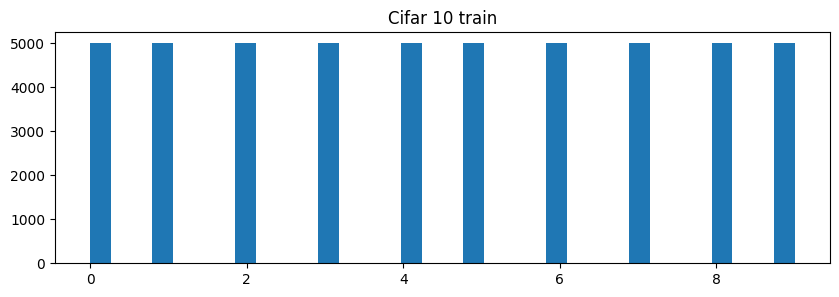

In [20]:
# Distribution of classes in training data
plt.figure(figsize=(10, 3))
_ = plt.hist(cifar10_y_train, bins='auto')
plt.title("Cifar 10 train")

plt.show()

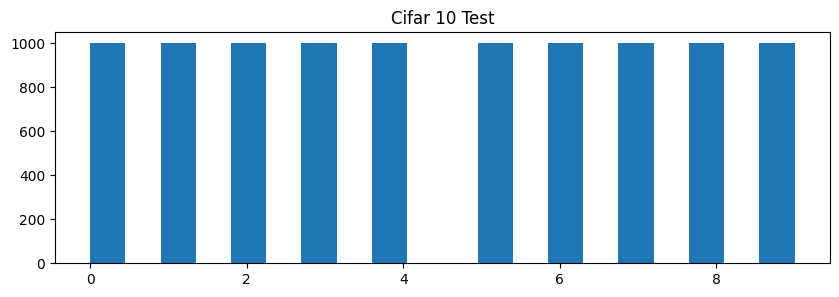

In [21]:
# Distribution of classes in testing data
plt.figure(figsize=(10, 3))
_ = plt.hist(cifar10_y_test, bins='auto')
plt.title("Cifar 10 Test")

plt.show()

In [22]:
# SVHN
print(f'Number of SVHN training images:: {svhn_x_train.shape[0]}')
print(f'Number of SVHN test images:: {svhn_x_test.shape[0]}')

print(f'Number of rows:: {svhn_x_train.shape[1]}')
print(f'Number of columns:: {svhn_x_train.shape[2]}')
print(f'Number of channels:: {svhn_x_train.shape[3]}')


Number of SVHN training images:: 73257
Number of SVHN test images:: 26032
Number of rows:: 32
Number of columns:: 32
Number of channels:: 3


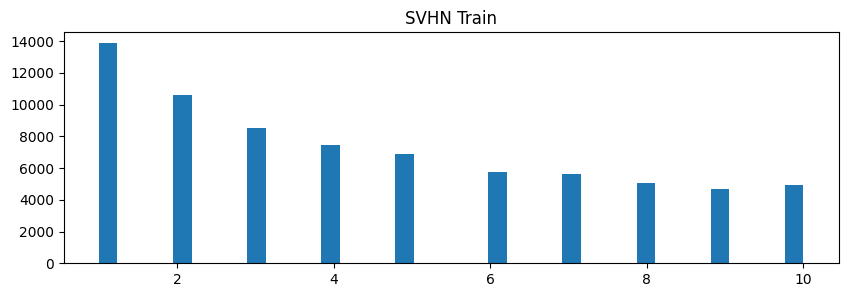

In [23]:
# Distribution of classes in training data
plt.figure(figsize=(10, 3))
_ = plt.hist(svhn_y_train, bins='auto')
plt.title("SVHN Train")

plt.show()

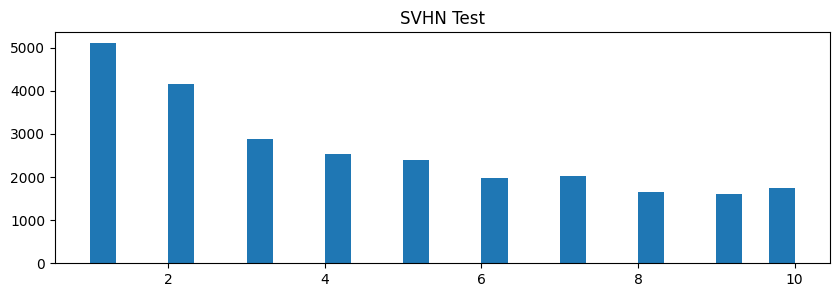

In [24]:
# Distribution of classes in testing data
plt.figure(figsize=(10, 3))
_ = plt.hist(svhn_y_test, bins='auto')
plt.title("SVHN Test")

plt.show()

We can see from the histograms generated above that the Cifar 10 dataset has its classes with a more uniform distribution, while the SVHN dataset has a concentration of smaller numbers.



## 2.3 Gaussian Noise Injection

An effective technique for enhancing the capability of image recognition models is the insertion of random noise into the images. This "noise" consists of small perturbations added to the pixel values, using a known probability distribution, such as the normal (Gaussian) distribution.

By adding noise to the images during training, we effectively increase the diversity of the training data, which can improve the model's ability to generalize to new images. Additionally, this approach makes the training more robust, preparing the model to handle the variations and imperfections present in real-world images, captured by different devices and under different lighting and resolution conditions.

However, it's important to exercise caution when adding noise, as an excess can impair the model's ability to recognize relevant patterns in the images. There's no "magic" amount of noise that works for all cases. It's necessary to conduct experiments and adjustments to determine the optimal amount of noise and ensure that the model is trained effectively.

---

In this project, we generated two versions for both datasets, using signals with variances of 0.001 and 0.01, respectively.


In [25]:
# creating dictionary with the data
cifar10_data = {
    'train' : cifar10_x_train,
    'test' : cifar10_x_test
}


cifar10_data['train_noise_0001'] = random_noise(cifar10_x_train, mode='gaussian', var=0.001).astype('float16')
cifar10_data['test_noise_0001'] = random_noise(cifar10_x_test, mode='gaussian', var=0.001).astype('float16')

cifar10_data['train_noise_001'] = random_noise(cifar10_x_train, mode='gaussian', var=0.01).astype('float16')
cifar10_data['test_noise_001'] = random_noise(cifar10_x_test, mode='gaussian', var=0.01).astype('float16')


In [26]:
svhn_data = {
    'train' : svhn_x_train,
    'test' : svhn_x_test
}

svhn_data['train_noise_0001'] = random_noise(svhn_x_train, mode='gaussian', var=0.001).astype('float16')
svhn_data['test_noise_0001'] = random_noise(svhn_x_test, mode='gaussian', var=0.001).astype('float16')

svhn_data['train_noise_001'] = random_noise(svhn_x_train, mode='gaussian', var=0.01).astype('float16')
svhn_data['test_noise_001'] = random_noise(svhn_x_test, mode='gaussian', var=0.01).astype('float16')


In [27]:
# dictionary of CIFAR 10 class meanings
# source: https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10/load_data

classes_dict = {
    0:'airplane',
1:'automobile',
2:'bird',
3:'cat',
4:'deer',
5:'dog',
6:'frog',
7:'horse',
8:'ship',
9:'truck'
}

In [28]:
# list of indices of the first representative of each class in the training dataset

imgs_idxs = [ np.where(cifar10_y_train == x)[0][0] for x in range(0, 10)]

images_list = [cifar10_data['train'][idx, :, :].astype('float32') for idx in imgs_idxs ]
images001_list = [cifar10_data['train_noise_001'][idx, :, :].astype('float32') for idx in imgs_idxs ]
images0001_list = [cifar10_data['train_noise_0001'][idx, :, :].astype('float32') for idx in imgs_idxs ]

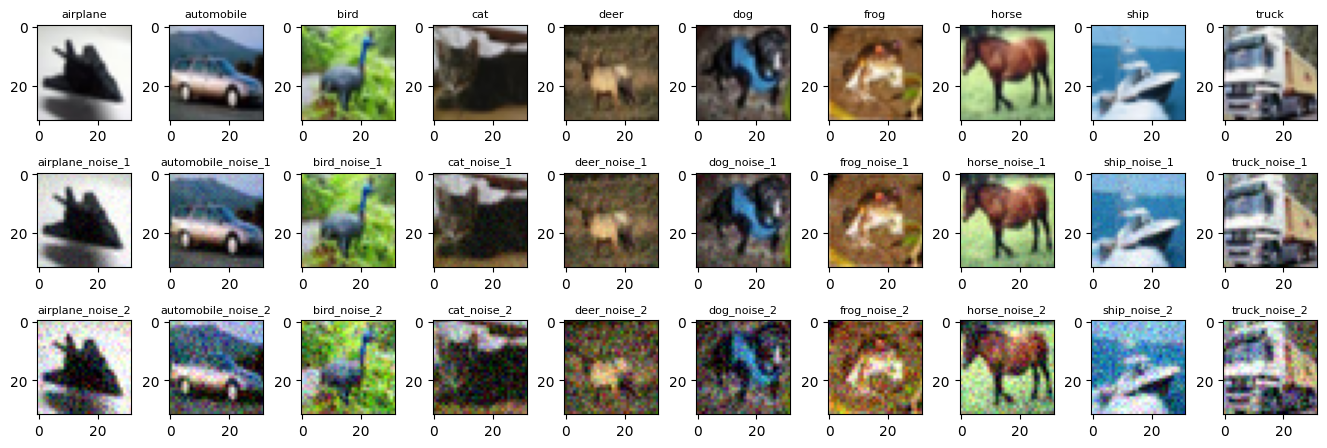

In [29]:

f, axes = plt.subplots(3, len(imgs_idxs), figsize=(16, 5))

dict_imges = {0:images_list, 1:images0001_list, 2:images001_list}

dict_labels = {0:'', 1:'_noise_1', 2:'_noise_2'}

for row in range(3):
  for col in range(10):
    axes[row, col].imshow(dict_imges[row][col])
    axes[row, col].set_title(classes_dict[col]+dict_labels[row], size=8)
    col+=1

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
plt.show()

In [30]:
# dictionary of SVHN class meanings
# source: http://ufldl.stanford.edu/housenumbers/

classes_dict = {
  1:'1',
  2:'2',
  3:'3',
  4:'4',
  5:'5',
  6:'6',
  7:'7',
  8:'8',
  9:'9',
  10:'0'
}

In [31]:
# list of indices of the first representative of each class in the training dataset
imgs_idxs = [ np.where(svhn_y_train == x)[0][0] for x in range(1, 11)]

images_list = [svhn_data['train'][idx, :, :].astype('float32') for idx in imgs_idxs ]
images001_list = [svhn_data['train_noise_001'][idx, :, :].astype('float32') for idx in imgs_idxs ]
images0001_list = [svhn_data['train_noise_0001'][idx, :, :].astype('float32') for idx in imgs_idxs ]



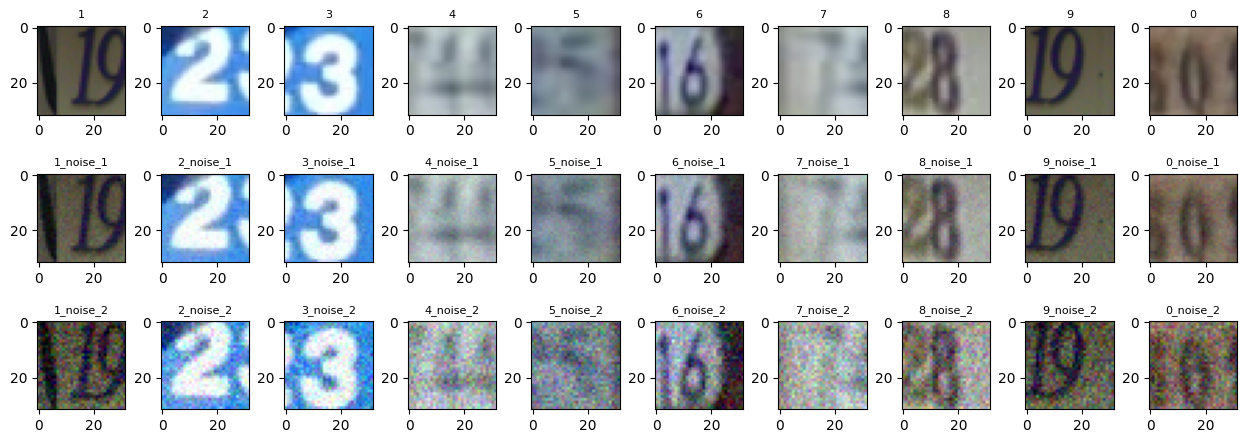

In [32]:

f, axes = plt.subplots(3, len(imgs_idxs), figsize=(15, 5))
dict_imges = {0:images_list, 1:images0001_list, 2:images001_list}
dict_labels = {0:'', 1:'_noise_1', 2:'_noise_2'}
for row in range(3):
  for col in range(10):
    axes[row, col].imshow(dict_imges[row][col])
    axes[row, col].set_title(classes_dict[col+1]+dict_labels[row], size=8)
    col+=1

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
plt.show()

## 2.4 Model Training

A model was trained for each version of the datasets. That is, 6 models were generated.

All models were trained using:
* Adam as the optimizer;
* For 10 epochs;
* The remaining parameters were left as the defaults of the methods in the Keras package.


We have 3 variations for each dataset: normal - noise1 (0.001) - noise2 (0.01).

We will train one model for each variation of the dataset (3), and for each model, test with each version of the test data (3). In the end, for each dataset, we will have (3x3) 9 comparison data.


In [33]:
def create_model():
  """
  Creates a convolutional neural network model for image classification following the structure defined in this project.

  Returns:
      model: A Keras Sequential model with the specified architecture.
          The architecture consists of convolutional layers, max pooling layers, and a dense layer at the end
          for classification into 10 classes using softmax activation function.

  Example:
      >>> model = create_model()
  """

  model = tf.keras.models.Sequential()
  # Conv2D: 16 neurons (filters), 3x3 kernels, ReLU
  # MaxPooling2D: 2x2 pool
  model.add(tf.keras.layers.Conv2D(16, kernel_size=(3, 3), activation ='relu', padding='same', input_shape=(32,32,3)))
  model.add(tf.keras.layers.MaxPooling2D(pool_size =(2, 2)))
  # Conv2D: 16 neurons (filters), 3x3 kernels, ReLU
  # Conv2D: 16 neurons (filters), 3x3 kernels, ReLU
  # MaxPooling2D: 2x2 pool
  model.add(tf.keras.layers.Conv2D(16, kernel_size=(3, 3), activation ='relu', padding='same'))
  model.add(tf.keras.layers.Conv2D(16, kernel_size=(3, 3), activation ='relu', padding='same'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size =(2, 2)))
  # Conv2D: 32 neurons (filters), 3x3 kernels, ReLU
  # Conv2D: 32 neurons (filters), 3x3 kernels, ReLU
  # MaxPooling2D: 2x2 pool
  model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation ='relu', padding='same'))
  model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation ='relu', padding='same'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size =(2, 2)))
  # Tip: Use a Flatten layer to transform the output of the third max pooling (which will be a tensor) into a vector
  model.add(tf.keras.layers.Flatten())
  # Dense: 10 neurons
  model.add(tf.keras.layers.Dense(10, activation='softmax'))

  return model

In [34]:
def model_execution(model, x_train, y_train, loss_function='sparse_categorical_crossentropy', n_epochs=10, eval_metrics=['accuracy']):
  """
  Executes the training of a neural network model.

  Args:
      model (tf.keras.Model): The neural network model to be trained.
      x_train (numpy.ndarray): The training dataset.
      y_train (numpy.ndarray): The target variable of the training dataset.
      loss_function (str, optional): The loss function used to guide the model optimization.
          Default is 'sparse_categorical_crossentropy'.
      n_epochs (int, optional): The number of training epochs. Default is 10.
      eval_metrics (list of str, optional): The evaluation metrics for the training epochs.
          Default is ['accuracy'].

  Returns:
      tf.keras.callbacks.History: The History object containing information about the evolution of metrics
          through the training epochs.

  Notes:
      The choice of the loss function is based on the recommendations from the article:
      'https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/'.

      The metric and optimizer are set according to project requirements before training the model.

  Example:
      >>> history = model_execution(model, x_train, y_train)
  """
  # choice of loss function based on the article https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/

  # metric and optimizer defined according to project requirements
  model.compile(optimizer='adam', loss=loss_function, metrics=eval_metrics)

  # recording the evolution of metrics through training epochs
  execution_history = model.fit(x=x_train, y=y_train, epochs=n_epochs)


  return execution_history


In [35]:
def evaluate_model(data, y_train):
    """
    Evaluates the neural network model on different combinations of training and test datasets.

    Args:
        data (dict): A dictionary containing different variations of the training dataset
            and the test dataset. The keys should be 'train', 'train_noise_001', 'train_noise_0001',
            'test', 'test_noise_001', and 'test_noise_0001', representing the different data combinations.
        y_train (numpy.ndarray): The target variable of the training dataset.

    Returns:
        dict: A dictionary containing the results of model training and evaluation for each
            combination of training and test dataset. Each key in the dictionary corresponds to a
            variation of the training dataset.

    Notes:
        This function creates a new instance of the model for each combination of training and test dataset,
        in order to prevent the weights and biases from one training interfering with the next.

    Example:
        >>> results = evaluate_model(cifar10_data, cifar10_y_train)
    """
    results = {}
    train_keys = [x for x in data.keys() if 'train' in x]
    test_keys = [x for x in data.keys() if 'test' in x]

    # for each training data, execute on a version of test data
    for train in train_keys:
      # creating a new instance of the model to prevent weights and biases from one training interfering with the next
      model = create_model()
      history = model_execution(model, data[train], y_train)
      results[train] = {'history': history}

      for idx, test in enumerate(test_keys):
        # predict returns probabilities of each class - we want the most probable one always
        results[train]['y_pred_'+str(idx)] = np.argmax(model.predict(data[test]).astype('float16'), axis=1).astype('uint8')

    return results

In [36]:
cifar10_results = evaluate_model(cifar10_data, cifar10_y_train)

Epoch 1/10
1563/1563 [==============================] - 13s 5ms/step - loss: 1.5596 - accuracy: 0.4317
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1893 - accuracy: 0.5784
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0292 - accuracy: 0.6364
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9392 - accuracy: 0.6696
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8751 - accuracy: 0.6944
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8279 - accuracy: 0.7101
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7960 - accuracy: 0.7200
Epoch 8/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7599 - accuracy: 0.7339
Epoch 9/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7341 - accuracy: 0.7418
Epoch 10/10
313/313 [==============================] - 1s 2ms/step
Epoch 1/10
156

In [37]:
# the 'sparse_categorical_crossentropy' function needs to receive values in the range [0, 10)
# to achieve this, reset the classes - making 10 be zero, as already described in: http://ufldl.stanford.edu/housenumbers/
# '10 classes, 1 for each digit. Digit '1' has label 1, '9' has label 9 and '0' has label 10.'

svhn_y_train[svhn_y_train==10] = 0
svhn_y_test[svhn_y_test==10] = 0

svhn_results = evaluate_model(svhn_data, svhn_y_train)

Epoch 1/10
2290/2290 [==============================] - 14s 5ms/step - loss: 0.9286 - accuracy: 0.6994
Epoch 2/10
2290/2290 [==============================] - 10s 4ms/step - loss: 0.4371 - accuracy: 0.8701
Epoch 3/10
2290/2290 [==============================] - 11s 5ms/step - loss: 0.3695 - accuracy: 0.8906
Epoch 4/10
2290/2290 [==============================] - 11s 5ms/step - loss: 0.3299 - accuracy: 0.9020
Epoch 5/10
2290/2290 [==============================] - 11s 5ms/step - loss: 0.3025 - accuracy: 0.9097
Epoch 6/10
2290/2290 [==============================] - 10s 4ms/step - loss: 0.2848 - accuracy: 0.9146
Epoch 7/10
2290/2290 [==============================] - 11s 5ms/step - loss: 0.2681 - accuracy: 0.9193
Epoch 8/10
2290/2290 [==============================] - 11s 5ms/step - loss: 0.2550 - accuracy: 0.9240
Epoch 9/10
2290/2290 [==============================] - 11s 5ms/step - loss: 0.2434 - accuracy: 0.9272
Epoch 10/10
814/814 [==============================] - 1s 2ms/step
Epoch 

Writing the results to a .pickle file to access the results more easily without having to go through the dataset training process each time.


In [38]:
with open('cifar10_execution_results.p', 'wb') as fp:
    pickle.dump(cifar10_results, fp, protocol=pickle.HIGHEST_PROTOCOL)

In [39]:
with open('svhn_execution_results.p', 'wb') as fp:
    pickle.dump(svhn_results, fp, protocol=pickle.HIGHEST_PROTOCOL)

In [40]:
with open('/content/cifar10_execution_results.p', 'rb') as fp:
    cifar10_results = pickle.load(fp)

In [41]:
with open('/content/svhn_execution_results.p', 'rb') as fp:
    svhn_results = pickle.load(fp)

In [45]:
svhn_data.keys()

dict_keys(['train', 'test', 'train_noise_0001', 'test_noise_0001', 'train_noise_001', 'test_noise_001'])

In [46]:
idx_with_data = [0,1,9]

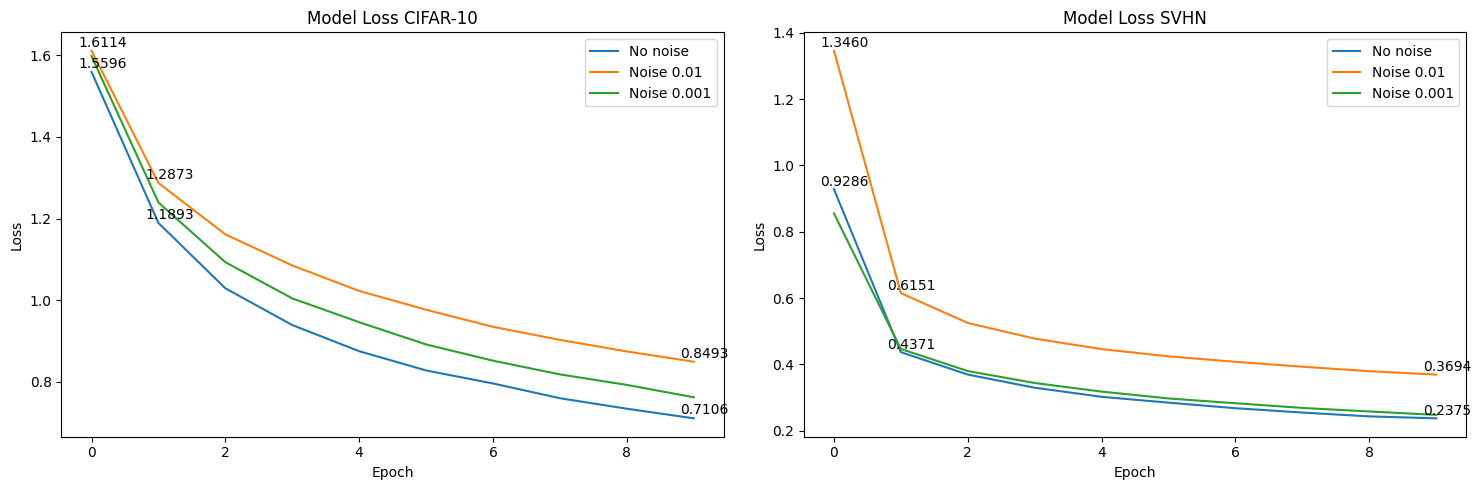

In [47]:
# Plotting the history of losses over time for CIFAR-10 and SVHN side by side
plt.figure(figsize=(15, 5))

# Plot for CIFAR-10
plt.subplot(1, 2, 1)
plt.plot(cifar10_results['train']['history'].history['loss'])
for index, data in enumerate(cifar10_results['train']['history'].history['loss']):
    if index in idx_with_data:
        plt.text(x=(index-0.2) , y=data+0.01 , s=f"{data:.4f}" , fontdict=dict(fontsize=10))
plt.plot(cifar10_results['train_noise_001']['history'].history['loss'])
for index, data in enumerate(cifar10_results['train_noise_001']['history'].history['loss']):
    if index in idx_with_data:
        plt.text(x=(index-0.2) , y=data+0.01 , s=f"{data:.4f}" , fontdict=dict(fontsize=10))
plt.plot(cifar10_results['train_noise_0001']['history'].history['loss'])
plt.title('Model Loss CIFAR-10')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['No noise', 'Noise 0.01', 'Noise 0.001'], loc='upper right')

# Plot for SVHN
plt.subplot(1, 2, 2)
# Adjustment of idx_with_data indices for SVHN, if necessary
# (indices may be different depending on the number of epochs)
# Assuming idx_with_data is already adjusted for SVHN
plt.plot(svhn_results['train']['history'].history['loss'])
for index, data in enumerate(svhn_results['train']['history'].history['loss']):
    if index in idx_with_data:
        plt.text(x=(index-0.2) , y=data+0.01 , s=f"{data:.4f}" , fontdict=dict(fontsize=10))
plt.plot(svhn_results['train_noise_001']['history'].history['loss'])
for index, data in enumerate(svhn_results['train_noise_001']['history'].history['loss']):
    if index in idx_with_data:
        plt.text(x=(index-0.2) , y=data+0.01 , s=f"{data:.4f}" , fontdict=dict(fontsize=10))
plt.plot(svhn_results['train_noise_0001']['history'].history['loss'])
plt.title('Model Loss SVHN')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['No noise', 'Noise 0.01', 'Noise 0.001'], loc='upper right')

plt.tight_layout()
plt.show()

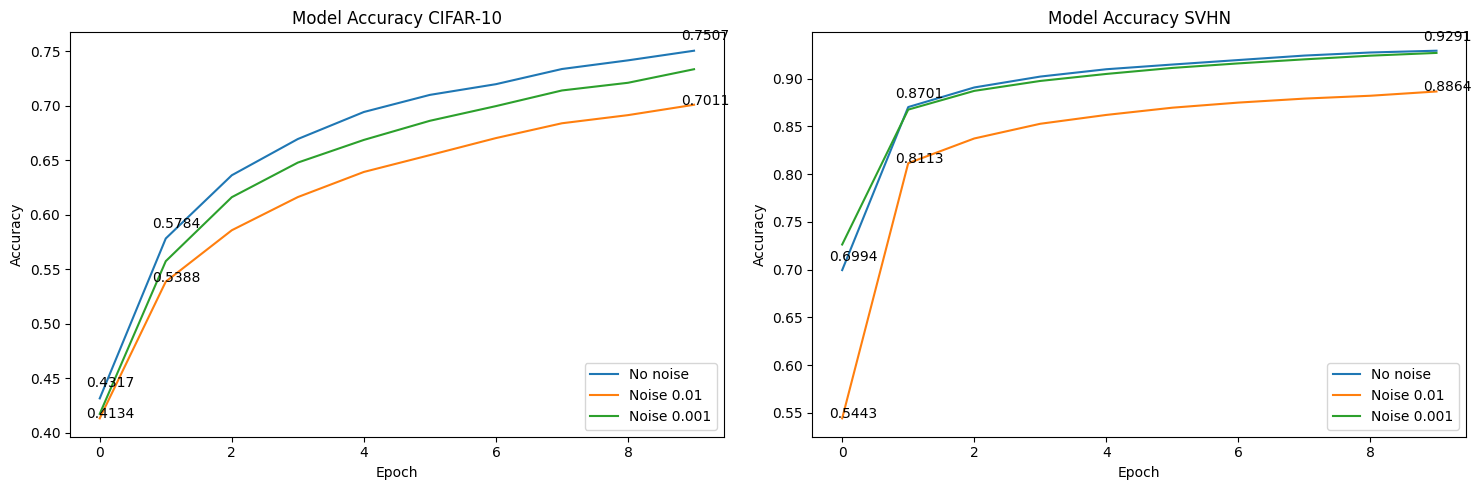

In [48]:
# Plotting the history of accuracies over time for CIFAR-10 and SVHN side by side
plt.figure(figsize=(15, 5))

# Plot for CIFAR-10
plt.subplot(1, 2, 1)
plt.plot(cifar10_results['train']['history'].history['accuracy'])
for index, data in enumerate(cifar10_results['train']['history'].history['accuracy']):
    if index in idx_with_data:
        plt.text(x=(index-0.2) , y=data+0.01 , s=f"{data:.4f}" , fontdict=dict(fontsize=10))
plt.plot(cifar10_results['train_noise_001']['history'].history['accuracy'])
for index, data in enumerate(cifar10_results['train_noise_001']['history'].history['accuracy']):
    if index in idx_with_data:
        plt.text(x=(index-0.2) , y=data , s=f"{data:.4f}" , fontdict=dict(fontsize=10))
plt.plot(cifar10_results['train_noise_0001']['history'].history['accuracy'])
plt.title('Model Accuracy CIFAR-10')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['No noise', 'Noise 0.01', 'Noise 0.001'], loc='lower right')

# Plot for SVHN
plt.subplot(1, 2, 2)
# Adjustment of idx_with_data indices for SVHN, if necessary
# (indices may be different depending on the number of epochs)
# Assuming idx_with_data is already adjusted for SVHN
plt.plot(svhn_results['train']['history'].history['accuracy'])
for index, data in enumerate(svhn_results['train']['history'].history['accuracy']):
    if index in idx_with_data:
        plt.text(x=(index-0.2) , y=data+0.01 , s=f"{data:.4f}" , fontdict=dict(fontsize=10))
plt.plot(svhn_results['train_noise_001']['history'].history['accuracy'])
for index, data in enumerate(svhn_results['train_noise_001']['history'].history['accuracy']):
    if index in idx_with_data:
        plt.text(x=(index-0.2) , y=data , s=f"{data:.4f}" , fontdict=dict(fontsize=10))
plt.plot(svhn_results['train_noise_0001']['history'].history['accuracy'])
plt.title('Model Accuracy SVHN')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['No noise', 'Noise 0.01', 'Noise 0.001'], loc='lower right')

plt.tight_layout()
plt.show()


It can be noticed from the above curves that the addition of noise impacts the learning process of the models and their predictive capacity and generalization of results.

# 3 Results and Insights

Now, let's try to understand the impacts of noise on the accuracy of the models
by evaluating the performance of the models on different variations of the datasets.


In [49]:
def calculate_accuracy_matrix(results, y_test):
    """
    Calculates the accuracy matrix for a set of results and true labels.

    Args:
    - results (dict): Dictionary containing the model results for a dataset.
    - y_test (array): Array of true labels for the dataset.

    Returns:
    - accuracy_matrix (numpy array): Accuracy matrix for the dataset.
    """

    # Initialize a matrix to store the results
    accuracy_matrix = []

    # Get the keys of the test data
    test_keys = list(results['train'].keys())[1:]  # Ignore the 'history' key

    # Iterate over the training data keys
    for train in results.keys():
        # Create a list to store the accuracy_score metrics for this combination
        accuracy_list = []

        # For each test data key
        for test in test_keys:
            # Calculate the accuracy_score between the predicted values and the true values
            acc = accuracy_score(results[train][test], y_test)
            # Add the accuracy_score to the list
            accuracy_list.append(acc)

        # Add the accuracy_score list for this combination to the matrix
        accuracy_matrix.append(accuracy_list)

    # Convert the matrix to a numpy array for easier manipulation
    accuracy_matrix = np.array(accuracy_matrix)

    return accuracy_matrix

# Example usage for CIFAR-10
cifar10_accuracy_matrix = calculate_accuracy_matrix(cifar10_results, cifar10_y_test)
print("Accuracy Score Matrix for CIFAR-10:")
print(cifar10_accuracy_matrix)

# Example usage for SVHN
svhn_accuracy_matrix = calculate_accuracy_matrix(svhn_results, svhn_y_test)
print("\nAccuracy Score Matrix for SVHN:")
print(svhn_accuracy_matrix)


Accuracy Score Matrix for CIFAR-10:
[[0.6916 0.689  0.4721]
 [0.6981 0.6883 0.4763]
 [0.6298 0.6343 0.6427]]

Accuracy Score Matrix for SVHN:
[[0.90258144 0.89451444 0.79625077]
 [0.90895821 0.90365704 0.84157959]
 [0.89109557 0.88802243 0.85982637]]


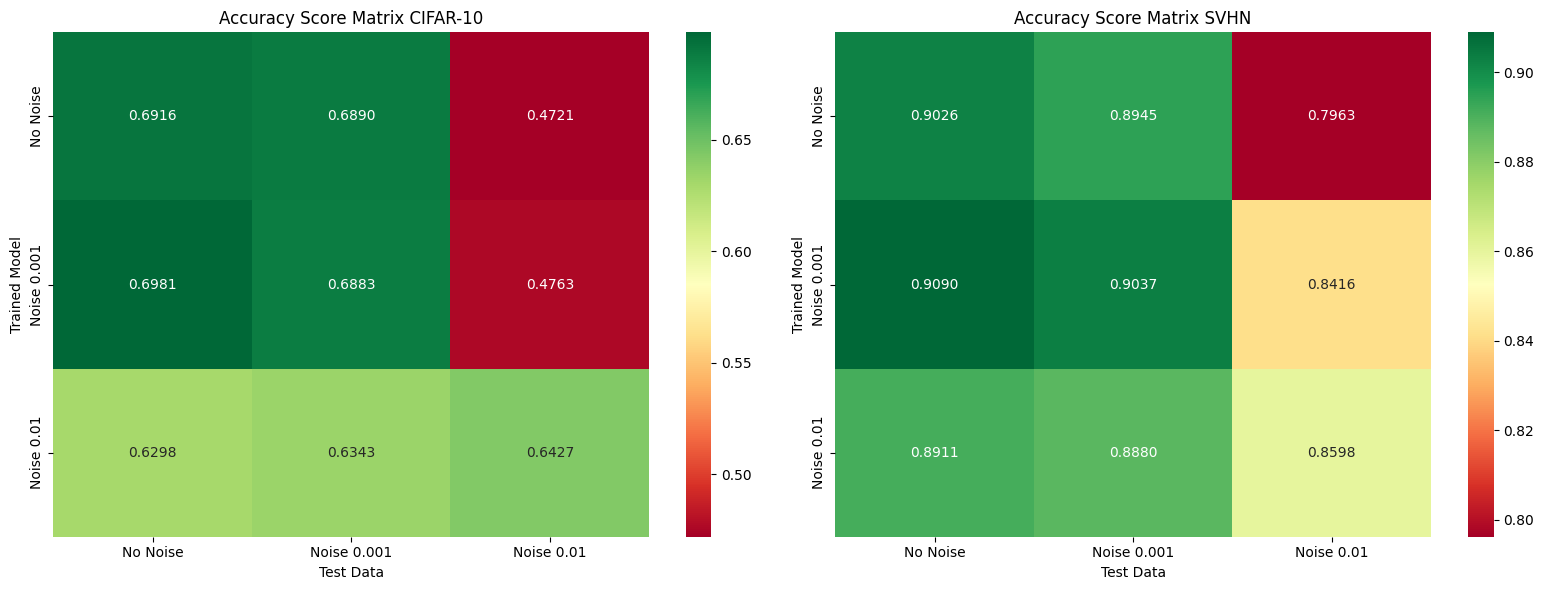

In [50]:
# Define the row and column labels
row_labels = ['No Noise', 'Noise 0.001', 'Noise 0.01']  # Place no-noise training at the first row
col_labels = ['No Noise', 'Noise 0.001', 'Noise 0.01']  # Place data with noise 0.01 at the last column

# Create the heatmap for CIFAR-10
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)  # subplot with 1 row, 2 columns, position 1
sns.heatmap(cifar10_accuracy_matrix, annot=True, cmap='RdYlGn', fmt=".4f", xticklabels=col_labels, yticklabels=row_labels)
plt.xlabel('Test Data')
plt.ylabel('Trained Model')
plt.title('Accuracy Score Matrix CIFAR-10')

# Create the heatmap for SVHN
plt.subplot(1, 2, 2)  # subplot with 1 row, 2 columns, position 2
sns.heatmap(svhn_accuracy_matrix, annot=True, cmap='RdYlGn', fmt=".4f", xticklabels=col_labels, yticklabels=row_labels)
plt.xlabel('Test Data')
plt.ylabel('Trained Model')
plt.title('Accuracy Score Matrix SVHN')

plt.tight_layout()  # To adjust the subplots
plt.show()

In [51]:
def plot_confusion_matrix(y_true, y_pred, title, ax):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')

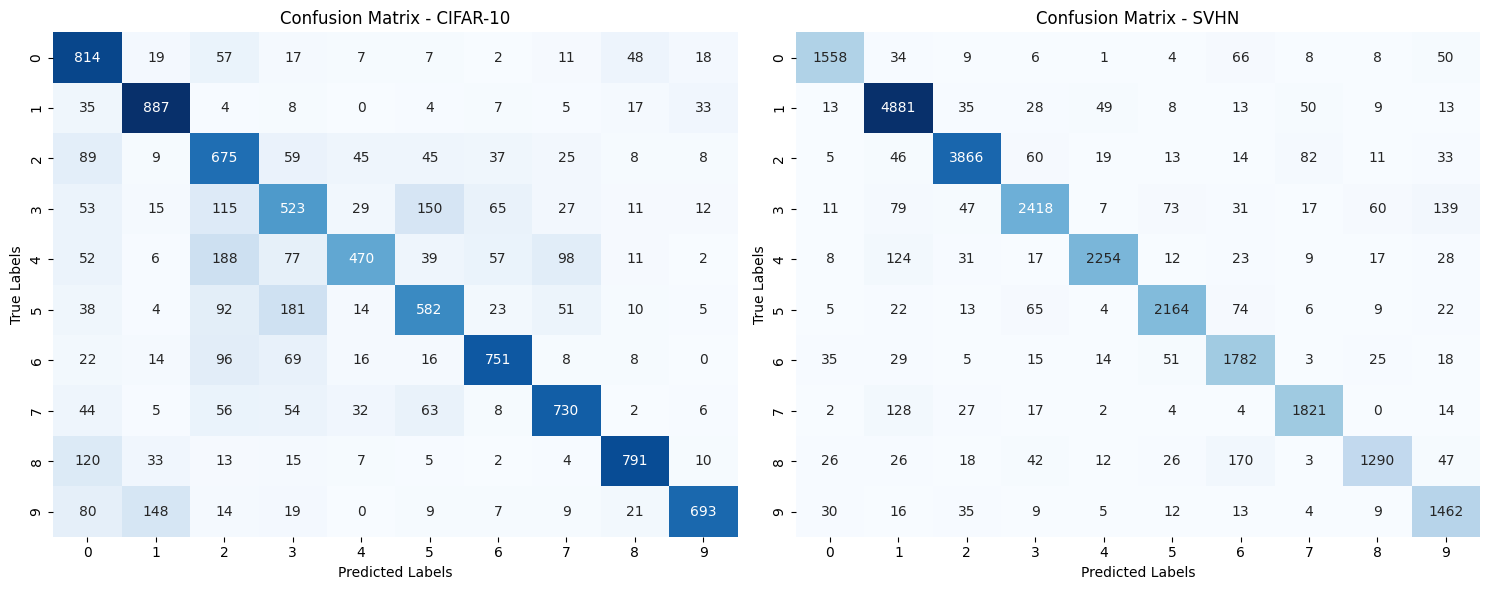

In [52]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# For CIFAR-10
y_pred_cifar10 = cifar10_results['train']['y_pred_0']  # Choose the desired dataset
plot_confusion_matrix(cifar10_y_test, y_pred_cifar10, 'Confusion Matrix - CIFAR-10', axs[0])

# For SVHN
y_pred_svhn = svhn_results['train']['y_pred_0']  # Choose the desired dataset
plot_confusion_matrix(svhn_y_test, y_pred_svhn, 'Confusion Matrix - SVHN', axs[1])

plt.tight_layout()
plt.show()


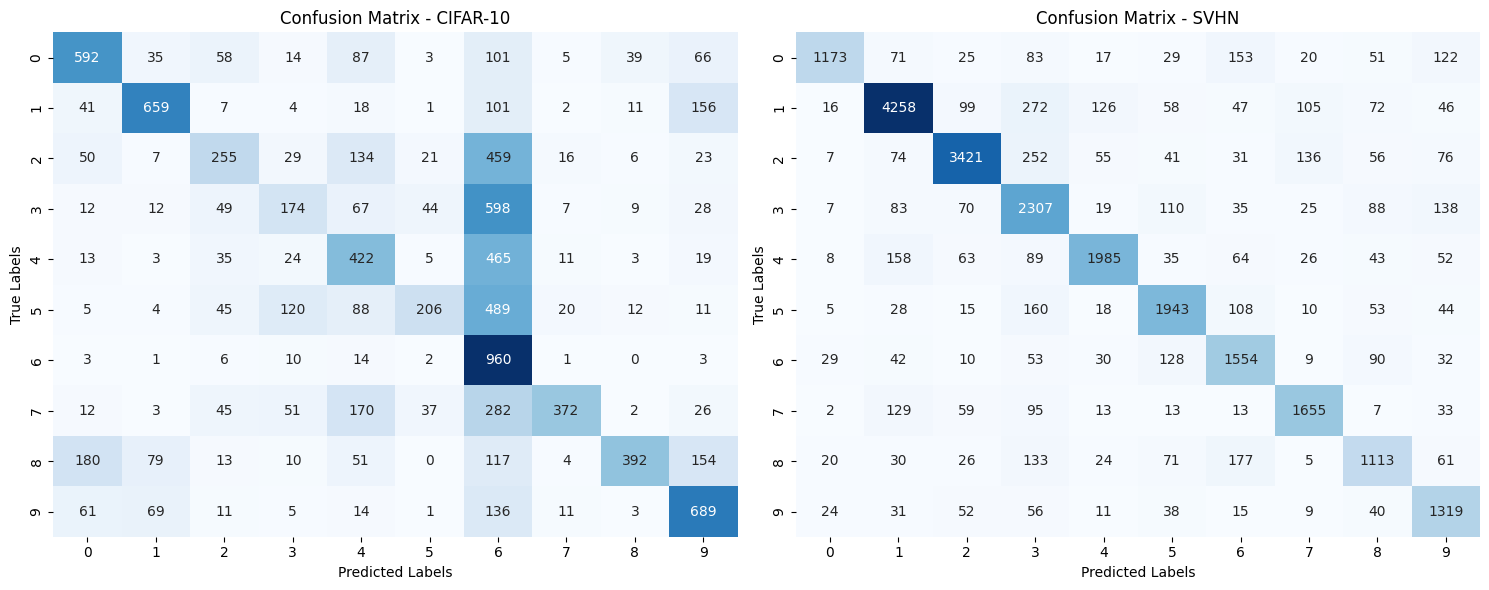

In [53]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# For CIFAR-10
y_pred_cifar10 = cifar10_results['train']['y_pred_2']  # Choose the desired dataset
plot_confusion_matrix(cifar10_y_test, y_pred_cifar10, 'Confusion Matrix - CIFAR-10', axs[0])

# For SVHN
y_pred_svhn = svhn_results['train']['y_pred_2']  # Choose the desired dataset
plot_confusion_matrix(svhn_y_test, y_pred_svhn, 'Confusion Matrix - SVHN', axs[1])

plt.tight_layout()
plt.show()

After analyzing the results, some important observations stand out, which can be summarized in two main points:

i) The presence of noise in the data makes the learning problem more complex, hindering the model's ability to learn accurately on noisy datasets;

ii) When a model is exposed to data significantly different from its training data (e.g., a model trained without noise evaluated on a test set with a lot of noise), its accuracy is impacted.

The overall behavior of the models was similar in both datasets, as can be observed from the color patterns of the accuracy matrices and confusion matrices. The average performance was higher on the housing numbers dataset, a dataset similar to those the Lenet architecture was intended to solve when it was developed.

Each model performs best when tested on the noise-free dataset and worst on the dataset with the highest noise. This demonstrates the increased difficulty in the training task with the insertion of noise. This characteristic is most pronounced in the model trained without noise when tested with higher noise data. This suggests that excessive noise in the data can significantly impair the model's learning process and ability to generalize results.

Another notable aspect is the stability of the model trained with higher noise ($\sigma^2 = 0.01$), which produced consistent results, with values close in all test configurations, albeit with lower overall accuracy.

The model trained with moderate noise ($\sigma^2=0.001$) had an intermediate performance but showed satisfactory results on noise-free or low-noise datasets, and performed better than the model trained without noise on the dataset with higher variance. This demonstrates a performance gain for the extreme case with cautious noise insertion.

These findings highlight the trade-off associated with introducing noise into the data during model training. While noise can make the learning task more complex and impair performance if applied excessively, in moderate amounts it can simulate realistic conditions and enhance the model's generalization ability. Although it does not achieve the highest performance metric, the model trained with moderate noise may be the most practical and useful option in real-world scenarios, where hardware for image capture is not standardized.

These conclusions underscore the importance of considering the noise level in the data during model training and emphasize the need for effective strategies to deal with noise and maximize model performance in a variety of conditions.

# 4 Suggestions for Further Reading and References


It is well-known in the field of Neural Networks that adding noise to the training dataset can have a positive impact on model performance, especially when the training set is small, as it increases the model's ability to generalize results. Here are some suggestions for further exploration on the topic:
* [DATA AUGMENTATION IN TRAINING CNNS: INJECTING NOISE TO IMAGES](https://openreview.net/pdf?id=SkeKtyHYPS)
* [Train Neural Networks With Noise to Reduce Overfitting](https://machinelearningmastery.com/train-neural-networks-with-noise-to-reduce-overfitting/)
* [Statquest YouTube Series on Neural Networks](https://www.youtube.com/watch?v=zxagGtF9MeU&list=PLblh5JKOoLUIxGDQs4LFFD--41Vzf-ME1&pp=iAQB)
* [Paper: Deep Convolutional Neural Networks and Noisy Images](https://sites.icmc.usp.br/moacir/papers/Nazare_CIARP2017_DNN-Noise.pdf)

However, there is no consensus on the appropriate amount of noise to be added for good results; ideally, testing different distributions and quantities is recommended.
